# EDA

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import metrics

In [37]:
df = pd.read_csv('heart3.csv')
df.head()

,age,BP,cholestrol,heart disease
0,70,130,322,1
1,67,115,564,0
2,57,124,261,1
3,64,128,263,0
4,74,120,269,0


In [38]:
df.shape

(270, 4)

In [39]:
df.dtypes

age              int64
BP               int64
cholestrol       int64
heart disease    int64
dtype: object

In [40]:
df.isnull()

,age,BP,cholestrol,heart disease
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
265,False,False,False,False
266,False,False,False,False
267,False,False,False,False
268,False,False,False,False


In [41]:
df.isnull().sum()

age              0
BP               0
cholestrol       0
heart disease    0
dtype: int64

In [42]:
df.describe()

,age,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000
mean,54.433333,131.344444,249.659259,0.444444
std,9.109067,17.861608,51.686237,0.497827
min,29.000000,94.000000,126.000000,0.000000
25%,48.000000,120.000000,213.000000,0.000000
50%,55.000000,130.000000,245.000000,0.000000
75%,61.000000,140.000000,280.000000,1.000000
max,77.000000,200.000000,564.000000,1.000000


In [43]:
df.corr()

,age,BP,cholestrol,heart disease
age,1.000000,0.273053,0.220056,0.212322
BP,0.273053,1.000000,0.173019,0.155383
cholestrol,0.220056,0.173019,1.000000,0.118021
heart disease,0.212322,0.155383,0.118021,1.000000


<Axes: >

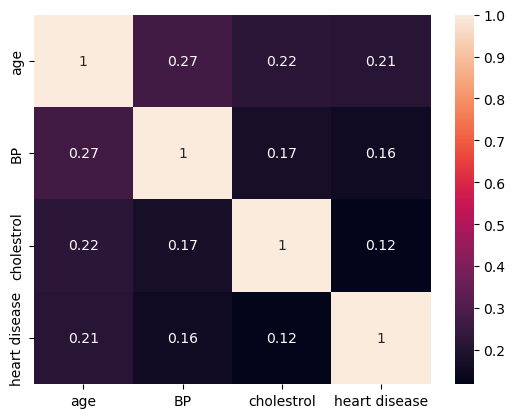

In [44]:
sns.heatmap(df.corr(),annot=True)

In [45]:
df['heart disease'].value_counts()

heart disease
0    150
1    120
Name: count, dtype: int64

# Spliting Dataset

In [46]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state= 99)

In [48]:
models = []
accuracies = []

# Descision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(X_train,y_train)

predicted_values = DecisionTree.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
print("DecisionTrees's Accuracy is: ", x*100)
models.append('Descision Tree')
accuracies.append(x)
print(classification_report(y_test,predicted_values))

DecisionTrees's Accuracy is:  54.41176470588235
              precision    recall  f1-score   support

           0       0.66      0.47      0.55        40
           1       0.46      0.64      0.54        28

    accuracy                           0.54        68
   macro avg       0.56      0.56      0.54        68
weighted avg       0.58      0.54      0.55        68



# Guassian Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train,y_train)

predicted_values = NaiveBayes.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
models.append('Guassian Naive Bayes')
accuracies.append(x)
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Naive Bayes's Accuracy is:  0.5
              precision    recall  f1-score   support

           0       0.59      0.50      0.54        40
           1       0.41      0.50      0.45        28

    accuracy                           0.50        68
   macro avg       0.50      0.50      0.50        68
weighted avg       0.52      0.50      0.50        68



# SVM

In [51]:
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)

X_test_norm = norm.transform(X_test)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,y_train)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(y_test, predicted_values)

print("SVM's Accuracy is: ", x)
models.append('SVM')
accuracies.append(x)
print(classification_report(y_test,predicted_values))

SVM's Accuracy is:  0.5882352941176471
              precision    recall  f1-score   support

           0       0.64      0.70      0.67        40
           1       0.50      0.43      0.46        28

    accuracy                           0.59        68
   macro avg       0.57      0.56      0.56        68
weighted avg       0.58      0.59      0.58        68



# Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion = 'gini', max_depth = 8, min_samples_split = 10, random_state = 5)

In [53]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [54]:
clf.feature_importances_

array([0.38994547, 0.25754527, 0.35250927])

In [55]:
y_pred = clf.predict(X_test)

In [56]:
y_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[21, 19],
       [14, 14]], dtype=int64)

In [58]:
from sklearn.metrics import accuracy_score
x= accuracy_score(y_test, y_pred)
models.append('Random Forest')
accuracies.append(x)

In [59]:
accuracies = [a*100 for a in accuracies]

In [60]:
print(accuracies, models)

[54.41176470588235, 50.0, 58.82352941176471, 51.470588235294116] ['Descision Tree', 'Guassian Naive Bayes', 'SVM', 'Random Forest']


# Linear Reg

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

r2 = r2_score(y_test, y_pred)
print('R^2 Score:', -r2*100)
models.append('Linear Regression')
accuracies.append(-r2*100)


Mean Squared Error: 0.2549725526452992
R^2 Score: 5.267239592130668


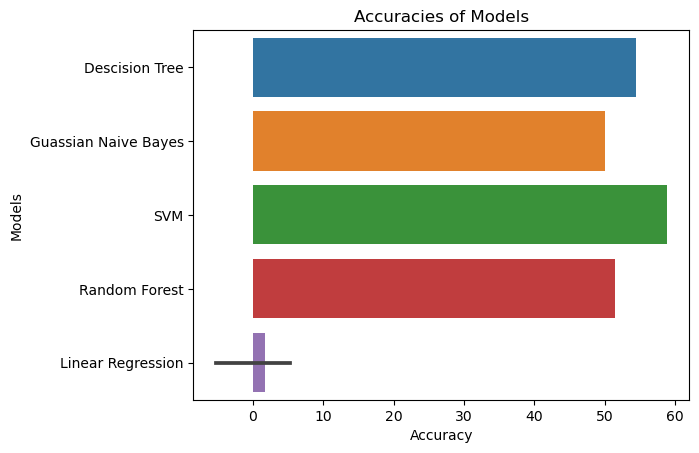

In [71]:
sns.barplot(x=accuracies, y= models)

# Add labels and title
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Accuracies of Models')

# Show plot
plt.show()

### Exporting Random Forest

In [62]:
import pickle

# Suppose you have a trained model
  # Your trained model object

# Export the model using pickle
with open('clf.pkl', 'wb') as f:
    pickle.dump(clf, f)

